In [1]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
#nlp = spacy.load("en_core_web_sm")

In [1]:
!pip install snscrape

In [2]:
!pip install textblob

In [3]:
!pip install wordcloud

In [4]:
!pip install spacy

## Q3) What is the sentiment of tweets around the China Covid19 Zero Policy and the probability of China reopening?

## We check for the tweets that match with the phrases china, lockdown and reopen for the year 2022 from each month

In [19]:
word = 'china lockdown reopen'
mo = [i for i in range(1,13)]
str1 = [str('2022-' + str(i) + '-01') for i in range(1,13)]
str2 = [str('2022-' + str(i) + '-28') for i in range(1,13)]

## Scraping upto 100k tweets for each month

In [20]:
tweets_list = []
maxTweets = 100000
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,j in zip(str1,str2):
    string1 = str(word + ' since:' + str(i) + ' until:' + str(j))
    #print(str('recession 2023' + ' since:' + i + ' until:' + j))
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(string1).get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content])
    print("Done",string1)#str('recession 2023' + ' since:' + i + ' until:' + j))

Done china lockdown reopen since:2022-1-01 until:2022-1-28
Done china lockdown reopen since:2022-2-01 until:2022-2-28
Done china lockdown reopen since:2022-3-01 until:2022-3-28
Done china lockdown reopen since:2022-4-01 until:2022-4-28
Done china lockdown reopen since:2022-5-01 until:2022-5-28
Done china lockdown reopen since:2022-6-01 until:2022-6-28
Done china lockdown reopen since:2022-7-01 until:2022-7-28
Done china lockdown reopen since:2022-8-01 until:2022-8-28
Done china lockdown reopen since:2022-9-01 until:2022-9-28
Done china lockdown reopen since:2022-10-01 until:2022-10-28
Done china lockdown reopen since:2022-11-01 until:2022-11-28
Done china lockdown reopen since:2022-12-01 until:2022-12-28


In [23]:
tweets_to_df.to_csv("chinalockdownreopen.csv")

In [2]:
df = pd.read_csv('chinalockdownreopen.csv')

In [3]:
df

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2022-01-27 19:58:54+00:00,1486790840127209473,@jenniferclmn @yangxifan No. Viruses are incom...
1,1,2022-01-27 13:19:04+00:00,1486690222113013765,COVID-19: North Korea set to reopen borders an...
2,2,2022-01-25 16:55:14+00:00,1486019845808345088,@botfly03889450 @Srirachachau China-style Zero...
3,3,2022-01-22 22:33:10+00:00,1485017723809583106,@RadCentrism @UniversalMaski2 @MelpomeneMel @k...
4,4,2022-01-22 19:41:35+00:00,1484974543907311620,This report paints a picture of perpetual lock...
...,...,...,...,...
178,178,2022-12-04 01:33:57+00:00,1599215399102337025,@AmiNumerique It hurts China economically for ...
179,179,2022-12-03 06:58:59+00:00,1598934805357285376,You know it’s been a depressing time in China ...
180,180,2022-12-03 06:00:54+00:00,1598920189940494336,"@Gonzalo1301 just remember \n\nChina is in ""lo..."
181,181,2022-12-02 23:33:03+00:00,1598822584560373760,@LarrotizPablo Things are getting better. The ...


In [4]:
df = df[['Text']]

In [5]:
df

,Text
0,@jenniferclmn @yangxifan No. Viruses are incom...
1,COVID-19: North Korea set to reopen borders an...
2,@botfly03889450 @Srirachachau China-style Zero...
3,@RadCentrism @UniversalMaski2 @MelpomeneMel @k...
4,This report paints a picture of perpetual lock...
...,...
178,@AmiNumerique It hurts China economically for ...
179,You know it’s been a depressing time in China ...
180,"@Gonzalo1301 just remember \n\nChina is in ""lo..."
181,@LarrotizPablo Things are getting better. The ...


## The tweet search might have yielded duplicates for different search term combinations. Hence dropping the duplicates

In [6]:
df.drop_duplicates(inplace = True)

C:\Users\rahul\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
df

,Text
0,@jenniferclmn @yangxifan No. Viruses are incom...
1,COVID-19: North Korea set to reopen borders an...
2,@botfly03889450 @Srirachachau China-style Zero...
3,@RadCentrism @UniversalMaski2 @MelpomeneMel @k...
4,This report paints a picture of perpetual lock...
...,...
178,@AmiNumerique It hurts China economically for ...
179,You know it’s been a depressing time in China ...
180,"@Gonzalo1301 just remember \n\nChina is in ""lo..."
181,@LarrotizPablo Things are getting better. The ...


## Cleaning the data

In [8]:
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
df['cleanedTweets'] = df['Text'].apply(cleanTweets)

C:\Users\rahul\AppData\Local\Temp/ipykernel_28316/1504086970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanedTweets'] = df['Text'].apply(cleanTweets)


In [9]:
df

,Text,cleanedTweets
0,@jenniferclmn @yangxifan No. Viruses are incom...,No. Viruses are incomplete RNA &amp; need a ...
1,COVID-19: North Korea set to reopen borders an...,COVID-19: North Korea set to reopen borders an...
2,@botfly03889450 @Srirachachau China-style Zero...,China-style Zero Covid strategy. Lockdown en...
3,@RadCentrism @UniversalMaski2 @MelpomeneMel @k...,Taiwan does the same strategy as China be...
4,This report paints a picture of perpetual lock...,This report paints a picture of perpetual lock...
...,...,...
178,@AmiNumerique It hurts China economically for ...,It hurts China economically for sure. I can s...
179,You know it’s been a depressing time in China ...,You know it’s been a depressing time in China ...
180,"@Gonzalo1301 just remember \n\nChina is in ""lo...","just remember China is in ""lock down"" and c..."
181,@LarrotizPablo Things are getting better. The ...,Things are getting better. The lockdown will ...


## Calculating the polarity and subjectivity of the cleaned tweet texts.

## Subjectivity shows the amount of personal opinion in a sentence. Its score lies between 0 and 1. If a tweet has high subjectivity i.e. close to 1, it means the tweet contains more of a personal opinion than factual information. 

## The polarity score lies between (-1 to 1) where -1 identifies the most negative words and 1 identifies the most positive words


In [10]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['cleanedTweets'].apply(getSubjectivity)
df['Polarity'] = df['cleanedTweets'].apply(getPolarity)
df.drop('Text', axis=1).head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_28316/739660142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subjectivity'] = df['cleanedTweets'].apply(getSubjectivity)
C:\Users\rahul\AppData\Local\Temp/ipykernel_28316/739660142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['cleanedTweets'].apply(getPolarity)


,cleanedTweets,Subjectivity,Polarity
0,No. Viruses are incomplete RNA &amp; need a ...,0.727273,0.068182
1,COVID-19: North Korea set to reopen borders an...,0.300000,0.000000
2,China-style Zero Covid strategy. Lockdown en...,0.625000,0.000000
3,Taiwan does the same strategy as China be...,0.125000,0.000000
4,This report paints a picture of perpetual lock...,0.433333,0.083333


In [11]:
df

,Text,cleanedTweets,Subjectivity,Polarity
0,@jenniferclmn @yangxifan No. Viruses are incom...,No. Viruses are incomplete RNA &amp; need a ...,0.727273,0.068182
1,COVID-19: North Korea set to reopen borders an...,COVID-19: North Korea set to reopen borders an...,0.300000,0.000000
2,@botfly03889450 @Srirachachau China-style Zero...,China-style Zero Covid strategy. Lockdown en...,0.625000,0.000000
3,@RadCentrism @UniversalMaski2 @MelpomeneMel @k...,Taiwan does the same strategy as China be...,0.125000,0.000000
4,This report paints a picture of perpetual lock...,This report paints a picture of perpetual lock...,0.433333,0.083333
...,...,...,...,...
178,@AmiNumerique It hurts China economically for ...,It hurts China economically for sure. I can s...,0.550617,0.070370
179,You know it’s been a depressing time in China ...,You know it’s been a depressing time in China ...,0.496667,-0.055000
180,"@Gonzalo1301 just remember \n\nChina is in ""lo...","just remember China is in ""lock down"" and c...",0.414444,0.002222
181,@LarrotizPablo Things are getting better. The ...,Things are getting better. The lockdown will ...,0.500000,0.500000


## Classifying the tweets into 3 categories 1. Positive 2. Negative 3. Neutral based on the polarity of the tweets

In [12]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

C:\Users\rahul\AppData\Local\Temp/ipykernel_28316/778507066.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Polarity'].apply(getAnalysis)


In [13]:
df

,Text,cleanedTweets,Subjectivity,Polarity,Analysis
0,@jenniferclmn @yangxifan No. Viruses are incom...,No. Viruses are incomplete RNA &amp; need a ...,0.727273,0.068182,Positive
1,COVID-19: North Korea set to reopen borders an...,COVID-19: North Korea set to reopen borders an...,0.300000,0.000000,Neutral
2,@botfly03889450 @Srirachachau China-style Zero...,China-style Zero Covid strategy. Lockdown en...,0.625000,0.000000,Neutral
3,@RadCentrism @UniversalMaski2 @MelpomeneMel @k...,Taiwan does the same strategy as China be...,0.125000,0.000000,Neutral
4,This report paints a picture of perpetual lock...,This report paints a picture of perpetual lock...,0.433333,0.083333,Positive
...,...,...,...,...,...
178,@AmiNumerique It hurts China economically for ...,It hurts China economically for sure. I can s...,0.550617,0.070370,Positive
179,You know it’s been a depressing time in China ...,You know it’s been a depressing time in China ...,0.496667,-0.055000,Negative
180,"@Gonzalo1301 just remember \n\nChina is in ""lo...","just remember China is in ""lock down"" and c...",0.414444,0.002222,Positive
181,@LarrotizPablo Things are getting better. The ...,Things are getting better. The lockdown will ...,0.500000,0.500000,Positive


## The optimism and willingness towards the reopening after a long lockdown seems to be the dominating sentiment of the netizens.

In [14]:
df['Analysis'].value_counts()

Positive    76
Negative    57
Neutral     49
Name: Analysis, dtype: int64

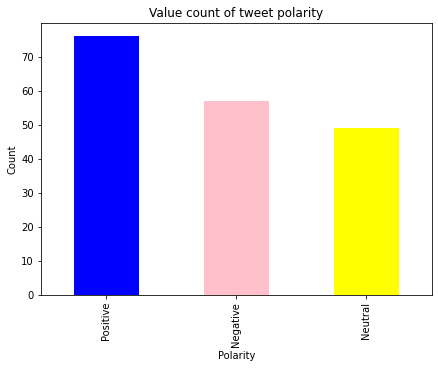

In [15]:
fig = plt.figure(figsize=(7,5))
color = ['blue','pink','yellow']
df['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

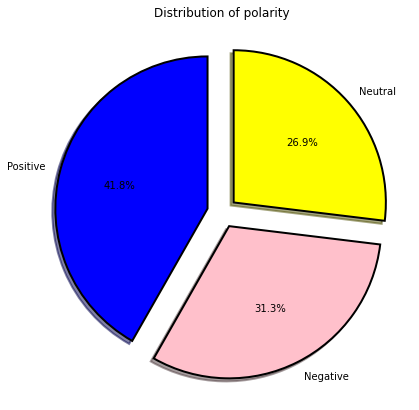

In [16]:
fig = plt.figure(figsize=(7,7))
colors = ('blue','pink','yellow')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

143


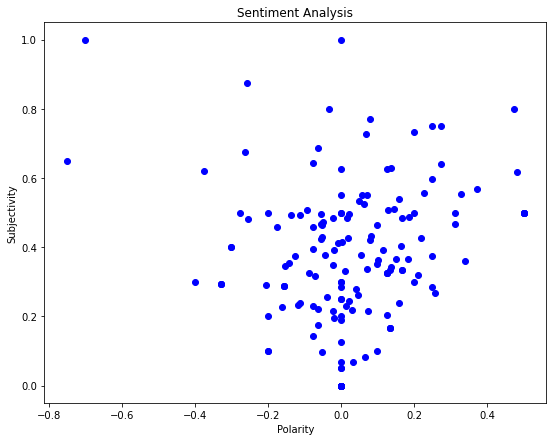

In [18]:
plt.figure(figsize=(9,7))
for i in range(0,df.shape[0]):
    try:
        plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='blue')
    except KeyError:
        print(i)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

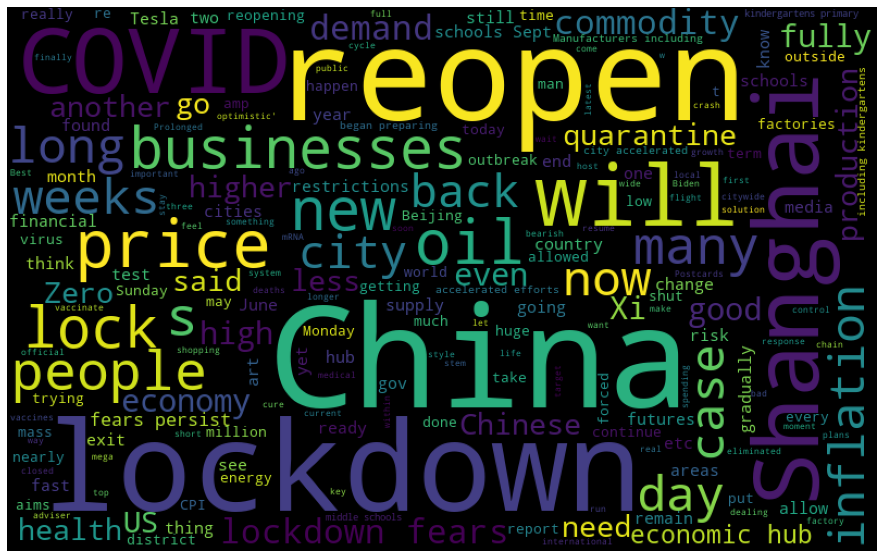

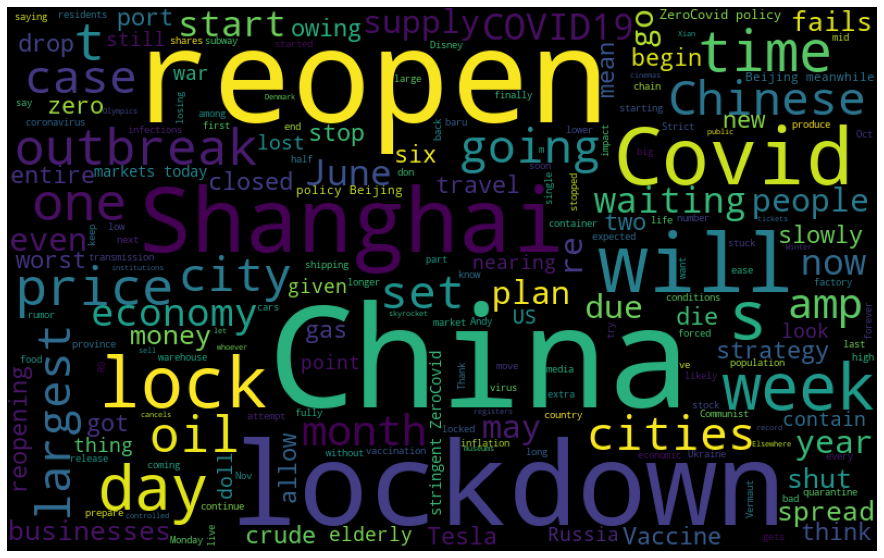

In [17]:
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = df.loc[df['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = df.loc[df['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

## Lets turn the words into feature vectors so that we can analyze the numerical importance of certain word combinations

In [20]:
#Removing Punctuation
import string
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
df['punct'] = df['cleanedTweets'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_6652/2030470429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['punct'] = df['cleanedTweets'].apply(lambda x: remove_punct(x))
C:\Users\rahul\AppData\Local\Temp/ipykernel_6652/2030470429.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))
C:\Users\rahul\AppData\Local\Temp/ipykernel_6652/2030470429.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Text,cleanedTweets,Subjectivity,Polarity,Analysis,punct,tokenized,nonstop,stemmed
0,@jenniferclmn @yangxifan No. Viruses are incom...,No. Viruses are incomplete RNA &amp; need a ...,0.727273,0.068182,Positive,No Viruses are incomplete RNA amp need a hos...,"[, no, viruses, are, incomplete, rna, amp, nee...","[, viruses, incomplete, rna, amp, need, host, ...","[, virus, incomplet, rna, amp, need, host, sur..."
1,COVID-19: North Korea set to reopen borders an...,COVID-19: North Korea set to reopen borders an...,0.300000,0.000000,Neutral,COVID1 North Korea set to reopen borders and r...,"[covid1, north, korea, set, to, reopen, border...","[covid1, north, korea, set, reopen, borders, r...","[covid1, north, korea, set, reopen, border, re..."
2,@botfly03889450 @Srirachachau China-style Zero...,China-style Zero Covid strategy. Lockdown en...,0.625000,0.000000,Neutral,Chinastyle Zero Covid strategy Lockdown enti...,"[, chinastyle, zero, covid, strategy, lockdown...","[, chinastyle, zero, covid, strategy, lockdown...","[, chinastyl, zero, covid, strategi, lockdown,..."
3,@RadCentrism @UniversalMaski2 @MelpomeneMel @k...,Taiwan does the same strategy as China be...,0.125000,0.000000,Neutral,Taiwan does the same strategy as China be...,"[, taiwan, does, the, same, strategy, as, chin...","[, taiwan, strategy, china, guess, taiwan, rep...","[, taiwan, strategi, china, guess, taiwan, rep..."
4,This report paints a picture of perpetual lock...,This report paints a picture of perpetual lock...,0.433333,0.083333,Positive,This report paints a picture of perpetual lock...,"[this, report, paints, a, picture, of, perpetu...","[report, paints, picture, perpetual, lockdown,...","[report, paint, pictur, perpetu, lockdown, amp..."


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['cleanedTweets'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df

182 Number of tweets has 1239 words


,,abc,acceler,accord,achiev,activ,actual,ad,addict,adject,...,zongm,أخباراليوم,世上最近的距离的直译是比较难让英语阅读者理解的,个人看法,中国百强城市排名第十的无锡昨天发现新增,就这样了,意译更好,是从解封重回到封闭,洪总好,这世上最近的距离
0,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analysis using N grams

In [22]:
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df['cleanedTweets'],(2,2),20)
n2_bigrams

[('china lockdown', 27),
 ('china reopen', 19),
 ('covid 19', 18),
 ('covid lockdown', 16),
 ('lockdown china', 11),
 ('lockdown reopen', 10),
 ('reopen china', 10),
 ('reopen schools', 10),
 ('zero covid', 8),
 ('shanghai china', 8),
 ('lockdown fears', 8),
 ('reopen covid', 7),
 ('19 lockdown', 7),
 ('fully reopen', 7),
 ('reopen businesses', 7),
 ('shanghai reopen', 7),
 ('schools sept', 7),
 ('set reopen', 6),
 ('china lock', 6),
 ('china covid', 6)]

In [23]:
n3_trigrams = get_top_n_gram(df['cleanedTweets'],(3,3),20)
n3_trigrams

[('covid 19 lockdown', 7),
 ('shanghai reopen schools', 6),
 ('lockdown fears persist', 6),
 ('china economic hub', 5),
 ('china largest city', 5),
 ('andy vermaut shares', 5),
 ('china online retailer', 5),
 ('online retailer sees', 5),
 ('retailer sees worrying', 5),
 ('sees worrying signs', 5),
 ('worrying signs shoppers', 5),
 ('signs shoppers reluctant', 5),
 ('shoppers reluctant reopen', 5),
 ('reluctant reopen wallets', 5),
 ('reopen wallets covid', 5),
 ('wallets covid lockdown', 5),
 ('covid lockdown ease', 5),
 ('shanghai subway shops', 5),
 ('subway shops reopen', 5),
 ('shops reopen streets', 5)]

## It can be seen that the majority of the people wish for a reopen from the trigrams such as ('shanghai reopen schools', 6), ('retailer sees worrying', 5), ('lockdown fears persist', 6) and that a section of the society still shows reluctance for reopen from phrases such as ('shoppers reluctant reopen', 5), ('reluctant reopen wallets', 5)  